In [ ]:
import pandas as pd
from google.colab import files
import re
from wordcloud import WordCloud
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
nltk.download(['punkt','wordnet','stopwords'])
import matplotlib.pyplot as plt
# pyLDAvis c'est pour la visualisation 

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
#pip install --upgrade pandas
#pip install --upgrade gensim
#pip install --upgrade pyLDAvis
#!pip install pyLDAvis

In [ ]:
!pip install pyLDAvis==3.3.1

In [ ]:
from gensim.utils import simple_preprocess


from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from gensim.corpora import Dictionary
from gensim.models import LdaModel

from gensim.models import CoherenceModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
path= '/content/drive/MyDrive/CSV_projet/final_data.csv'
data= pd.read_csv(path, sep = ",", encoding="utf-8")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['review_rate'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review_rate
1    406
5    178
4     57
3     45
2     30
Name: count, dtype: int64

In [ ]:
data.isna().sum()

In [ ]:
data["review_text"] = data["review_text"].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Supprimer les caractères de ponctuation sauf l'apostrophe
data["review_text"] = data["review_text"].apply(lambda x: re.sub(r'[^\w\s\']', '', x))

# Mettre en minuscule
data["review_text"] = data["review_text"].apply(lambda x: x.lower())

# Supprimer les numéros
data["review_text"] = data["review_text"].apply(lambda x: re.sub(r'\d+', '', x))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_rate,review_text,object_address,overall_rating,review_num,object_url,date_complete,postal_code,year,latitude_longitude,latitude,longitude,sentiment
0,1,"[agent, daccueil, lentr, personn, derrir, bure...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,janvier 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
1,5,"[vendredi, coup, venu, dame, brune, dune, cinq...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
2,1,"[horair, born, pann]","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,février 2023,75012,2023.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
3,1,"[agent, professionnalism, interromp, parol, ma...","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,mars 2021,75012,2021.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative
4,5,"[personnel, accueil, chaleureux]","5 Rue de la Durance, 75012 Paris, France",3.7,50,https://www.google.fr/maps/place/CPAM+Paris+12...,décembre 2022,75012,2022.0,"(48.8381167, 2.3938557)",48.838117,2.393856,Negative


In [ ]:
#tokenization
data['review_text']=data['review_text'].map(lambda x: word_tokenize(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
french_stopwords = stopwords.words('french')
french_stopwords += ["très", "a", "cpam", "merci", "jai", "cest", "aujourdhui", "bien", "déjà", "cette", "plus", "tout", "mois", "ça"]

data['review_text'] = data.review_text.apply(lambda x: [item for item in x if len(item) > 3 and item not in french_stopwords])
data['review_text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [agent, daccueil, lentr, personn, derrir, bure...
1      [vendredi, coup, venu, dame, brune, dune, cinq...
2                                   [horair, born, pann]
3      [agent, professionnalism, interromp, parol, ma...
4                       [personnel, accueil, chaleureux]
                             ...                        
711                                              [excel]
712                             [pire, employ, rcalcitr]
713                                                   []
714                                    [attent, terribl]
715                                                   []
Name: review_text, Length: 716, dtype: object

### Pour les avis à une seule étoile

In [ ]:
data_one_star_reviews = data[data['review_rate'] == 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Créer un dictionnaire de mots

#le dictionnaire créé  contient tous les mots uniques de l'ensemble de données.

dictionary = Dictionary(data_one_star_reviews["review_text"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Créer un corpus de documents

#La méthode "doc2bow" transforme chaque liste de mots prétraités en un sac de mots, 

#c'est-à-dire un vecteur de paires (mot_id, fréquence) qui représente le nombre d'occurrences de chaque mot dans le document.

corpus = [dictionary.doc2bow(text) for text in data_one_star_reviews["review_text"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus

In [ ]:
#mesure la similarité entre les mots dans un sujet donné en utilisant la log-probabilité négative de ces mots

#Plus la valeur de UMass est proche de zéro, plus le modèle est cohérent.
cohereence_liste = []

for K in range(1,10):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=K)
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    
    # Calculate the coherence score for the topics
    cohereence_liste.append(coherence_model.get_coherence())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cohereence_liste

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-2.622043528121097,
 -2.7330971208871477,
 -3.3930797835953235,
 -2.6580747433594007,
 -3.0608059809971233,
 -2.9128131286602836,
 -3.988197898541902,
 -3.6044978014468736,
 -4.748422783662436]

In [ ]:
# la valeur proche du 0 c'est le nombre optimal des topics

min_value = max(cohereence_liste)
optimal_topics_number = cohereence_liste.index(min_value)+1

optimal_topics_number

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


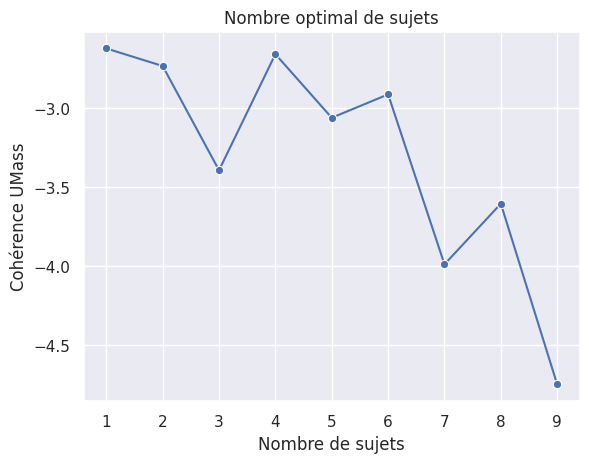

In [ ]:
# Tracer le graphique
sns.set(style="darkgrid")
sns.lineplot(x=range(1,10), y=cohereence_liste, marker="o")
plt.title('Nombre optimal de sujets')
plt.xlabel('Nombre de sujets')
plt.ylabel('Cohérence UMass')
plt.show()

In [ ]:
# Afficher les sujets 

# cela nous donne chaque termm avec le pourcentage d'existance par rapport au document 
topics = lda_model.show_topics(num_topics=2, num_words=10)
for topic in topics:
    print(topic)

(2, '0.016*"personn" + 0.014*"servic" + 0.013*"demand" + 0.010*"quil" + 0.008*"cart" + 0.007*"scurit" + 0.006*"public" + 0.006*"social" + 0.005*"vital" + 0.005*"comm"')
(5, '0.021*"aucun" + 0.015*"servic" + 0.012*"personn" + 0.009*"perdu" + 0.009*"rien" + 0.008*"cett" + 0.007*"fait" + 0.007*"scurit" + 0.007*"depui" + 0.006*"rpons"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
K=2

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=K)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from IPython.display import display

# Générer la visualisation pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Afficher la visualisation
display(pyLDAvis.display(vis))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Pour les avis à cinq étoiles

In [ ]:
data_one_five_reviews = data[data['review_rate'] == 5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Créer un dictionnaire de mots

#le dictionnaire créé  contient tous les mots uniques de l'ensemble de données.

dictionary = Dictionary(data_one_five_reviews["review_text"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Créer un corpus de documents

#La méthode "doc2bow" transforme chaque liste de mots prétraités en un sac de mots, 

#c'est-à-dire un vecteur de paires (mot_id, fréquence) qui représente le nombre d'occurrences de chaque mot dans le document.

corpus = [dictionary.doc2bow(text) for text in data_one_five_reviews["review_text"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#mesure la similarité entre les mots dans un sujet donné en utilisant la log-probabilité négative de ces mots

#Plus la valeur de UMass est proche de zéro, plus le modèle est cohérent.
cohereence_liste = []

for K in range(1,10):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=K)
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    
    # Calculate the coherence score for the topics
    cohereence_liste.append(coherence_model.get_coherence())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cohereence_liste

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-3.372986582412609,
 -3.773413161314534,
 -6.263852838090472,
 -6.118976250116827,
 -8.06173110448502,
 -7.615652855377571,
 -7.8578959418820675,
 -8.687011385116598,
 -9.712058203886194]

In [ ]:
# la valeur proche du 0 c'est le nombre optimal des topics

min_value = max(cohereence_liste)
optimal_topics_number = cohereence_liste.index(min_value)+1

optimal_topics_number

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


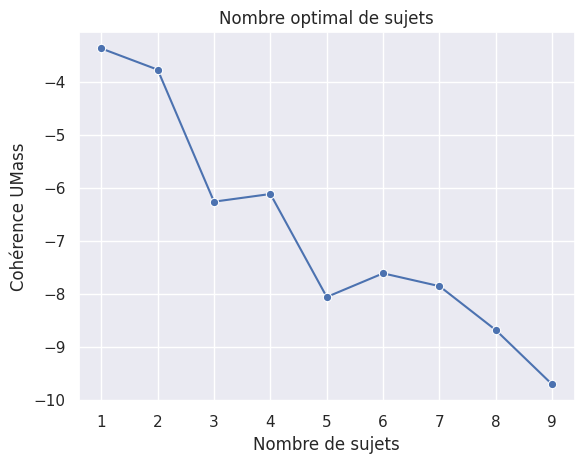

In [ ]:
# Tracer le graphique
sns.set(style="darkgrid")
sns.lineplot(x=range(1,10), y=cohereence_liste, marker="o")
plt.title('Nombre optimal de sujets')
plt.xlabel('Nombre de sujets')
plt.ylabel('Cohérence UMass')
plt.show()

In [ ]:
# Afficher les sujets 

# cela nous donne chaque termm avec le pourcentage d'existance par rapport au document 
topics = lda_model.show_topics(num_topics=2, num_words=10)
for topic in topics:
    print(topic)

(4, '0.024*"servic" + 0.020*"personnel" + 0.012*"grand" + 0.010*"rapid" + 0.010*"gentilless" + 0.010*"peut" + 0.009*"problm" + 0.009*"dossier" + 0.009*"agent" + 0.009*"rendezv"')
(2, '0.016*"agrabl" + 0.012*"accueil" + 0.011*"vraiment" + 0.011*"rapid" + 0.010*"aimabl" + 0.010*"rendezv" + 0.010*"efficac" + 0.010*"temp" + 0.010*"parfait" + 0.010*"madam"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
K=2

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=K)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from IPython.display import display

# Générer la visualisation pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Afficher la visualisation
display(pyLDAvis.display(vis))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
